In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import json
from shapely.geometry import Point, Polygon
from math import sin, cos, sqrt, atan2, radians
states_geojson = json.load(open('./add_jsons/states_5m.json', 'r'))

/home/mrjoness/anaconda3/envs/gmaps_env/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Alabama (2, 1)
Alaska (118, 1)
(118,)
Arizona (1, 979, 2)
Arkansas (1, 1957, 2)
California (9, 1)
Colorado (1, 386, 2)
Connecticut (1, 361, 2)
Delaware (3, 1)
District of Columbia (1, 72, 2)
Florida (14, 1)
Georgia (1, 2096, 2)
Hawaii (9, 1)
Idaho (1, 1407, 2)
Illinois (1, 1818, 2)
Indiana (1, 1129, 2)
Iowa (1, 1997, 2)
Kansas (1, 999, 2)
Kentucky (2, 1)
Louisiana (2, 1)
Maine (21, 1)
Maryland (3, 1)
Massachusetts (4, 1)
Michigan (12, 1)
Minnesota (1, 3486, 2)
Mississippi (5, 1)
Missouri (1, 2251, 2)
Montana (1, 1038, 2)
Nebraska (1, 1511, 2)
Nevada (1, 517, 2)
New Hampshire (1, 1369, 2)
New Jersey (1, 788, 2)
New Mexico (1, 420, 2)
New York (7, 1)
North Carolina (3, 1)
North Dakota (1, 1728, 2)
Ohio (3, 1)
Oklahoma (1, 1587, 2)
Oregon (1, 979, 2)
Pennsylvania (1, 1070, 2)
Rhode Island (7, 1)
South Carolina (1, 1462, 2)
South Dakota (1, 1354, 2)
Tennessee (1, 1651, 2)
Texas (4, 1)
Utah (1, 269, 2)
Vermont (1, 1294, 2)
Virginia (4, 1)
Washington (12, 1)
West Virginia (1, 2857, 2)
Wiscon

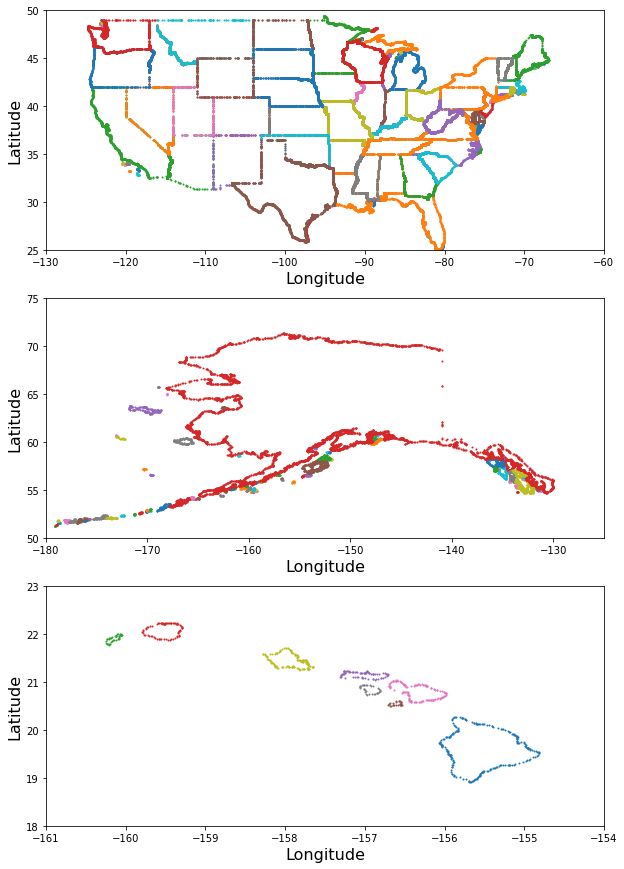

In [3]:
exclude_names = ['District of Columbia', 'Hawaii', 'Alaska', 'Puerto Rico']
name_list = []
coord_list = []

fig, axes = plt.subplots(3, figsize=(10, 15)) 
s, m = 1, 'o'

for state in states_geojson['features']:
    name = state['properties']['NAME']
    coords = state['geometry']['coordinates']
    print(name, np.shape(coords))

    if len(np.shape(coords))==2:
        coords = [x[0] for x in coords]
    
    if name not in exclude_names:
        name_list.append(name)
        coord_list.append(coords)
        ax = axes[0]
        
        # only label for one land mass
        polys = []
        label = name
        for xy in coords:
            xy = np.array(xy)
            ax.scatter(xy[:, 0], xy[:, 1], s=s, marker=m, label=label)
            label = ''

    elif name == 'Alaska':
        ax = axes[1] 
        alaska_coords = coords
        print(np.shape(coords))
        
        for xy in coords:
            xy = np.array(xy)
            ax.scatter(xy[:, 0], xy[:, 1], s=s, marker=m, label=label)
            label = ''
        
    elif name == 'Hawaii':
        ax = axes[2]
        hawaii_coords = coords
        
        for xy in coords:
            xy = np.array(xy)
            ax.scatter(xy[:, 0], xy[:, 1], s=s, marker=m, label=label)
            label = ''
        
# set all coordinates individually
axes[0].set_xlim(-130, -60)
axes[0].set_ylim(25, 50)

axes[1].set_xlim(-180, -125)
axes[1].set_ylim(50, 75)

axes[2].set_xlim(-161, -154)
axes[2].set_ylim(18, 23)

for ax in axes:
    ax.set_xlabel('Longitude', fontsize=16)
    ax.set_ylabel('Latitude', fontsize=16)
#ax.legend()

In [4]:
## fill a grid for each states

def build_grid(coords, latrng, lngrng, latstep=0.2, lngstep=0.1):
    '''return a grid of points all within USA boundaries'''

    
    grid_list = []
    for lat in np.arange(latrng[0], latrng[1], latstep):
        for lng in np.arange(lngrng[0], lngrng[1], lngstep):
            pt = Point(lng, lat)
                
            # next check each state  for more precise 
            for poly in poly_list:
                if poly.contains(pt):
                    grid_list.append([lat, lng])
                    break
            
    return np.array(grid_list)

grid_list = []
borders_list = []

for name, coords in zip(name_list, coord_list):
    
    # concatenate into borders
    borders = np.concatenate(coords)
    poly_list = [Polygon(x) for x in coords]
    borders_list.append(borders)
    
    # use most efficient lat/lng range
    latrng = (min(borders[:, 1]), max(borders[:, 1]))
    lngrng = (min(borders[:, 0]), max(borders[:, 0]))
    grid = build_grid(poly_list, latrng, lngrng, latstep=0.1, lngstep=0.1)
    grid_list.append(grid)
    

Alabama (1285, 2)
[-87.773227 -87.673227 -87.573227 -88.373227 -88.273227] [30.321132 30.321132 30.321132 30.421132 30.421132]
Arizona (2861, 2)
[-111.313991 -111.213991 -111.113991 -111.013991 -110.913991] [31.432177 31.432177 31.432177 31.432177 31.432177]
Arkansas (1327, 2)
[-94.017919 -93.917919 -93.817919 -93.717919 -93.617919] [33.104106 33.104106 33.104106 33.104106 33.104106]
California (4171, 2)
[-117.109591 -117.009591 -116.909591 -116.809591 -116.709591] [32.634156 32.634156 32.634156 32.634156 32.634156]
Colorado (2800, 2)
[-108.960253 -108.860253 -108.760253 -108.660253 -108.560253] [37.092426 37.092426 37.092426 37.092426 37.092426]
Connecticut (141, 2)
[-73.627775 -73.527775 -73.427775 -73.527775 -73.427775] [41.085171 41.085171 41.085171 41.185171 41.185171]
Delaware (51, 2)
[-75.688658 -75.588658 -75.488658 -75.388658 -75.288658] [38.551013 38.551013 38.551013 38.551013 38.551013]
Florida (1390, 2)
[-81.534938 -81.334938 -81.334938 -81.034938 -80.934938] [24.644701 24.

Text(0, 0.5, 'Latitude')

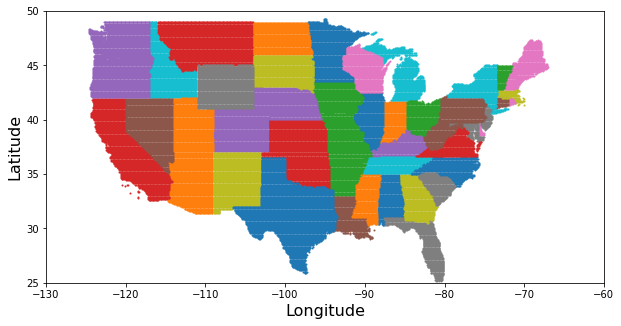

In [79]:
# plot state polys
fig, ax = plt.subplots(1, figsize=(10, 5), sharey=True, sharex=True)
                         
s = 1
c = 1
m = 'o'
    
for name, grid in zip(name_list, grid_list):
    print(name, np.shape(grid))
    try:
        ax.scatter(grid[:, 1], grid[:, 0], s=s, marker=m)
        print(grid[:5, 1], grid[:5, 0])
    except:
        print(name, 'None')

ax.set_xlim(-130, -60)
ax.set_ylim(25, 50)

ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)

In [161]:
# find number of state within a 100 mile radius

def dist_curved(xy1, xy2, R = 6373.0):
    
    lat1 = radians(xy1[0])
    lon1 = radians(xy1[1])
    lat2 = radians(xy2[0])
    lon2 = radians(xy2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

                    
def check_borders(grid_point, border_list, state_name, dist_cutoff=161):
    '''Find minimum distance from point to each border in the border_dict
       return country and min distance'''
    
    min_dist_list = []
    state_name_list = []
    
    for name, border in zip(name_list, border_list):
        
        if name != state_name:
            max_dist, min_dist = 0, 100000

            for border_point in border:
                border_point = [border_point[1], border_point[0]]
                test_dist = dist_curved(grid_point, border_point)
                if test_dist < min_dist:
                    min_dist = test_dist
            min_dist_list.append(min_dist)

    n_contained = np.sum(np.array(min_dist_list) <  dist_cutoff)
    return n_contained

ns = 1000
run = True

if run:
    contained_list = []
    for name, grid in zip(name_list, grid_list):

        grid_contained = []
        print(name)

        for i, xy in enumerate(grid):

            n_contained = check_borders(xy, borders_list, name, dist_cutoff=322)
            grid_contained.append(n_contained)
        contained_list.append(grid_contained)


Alabama
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


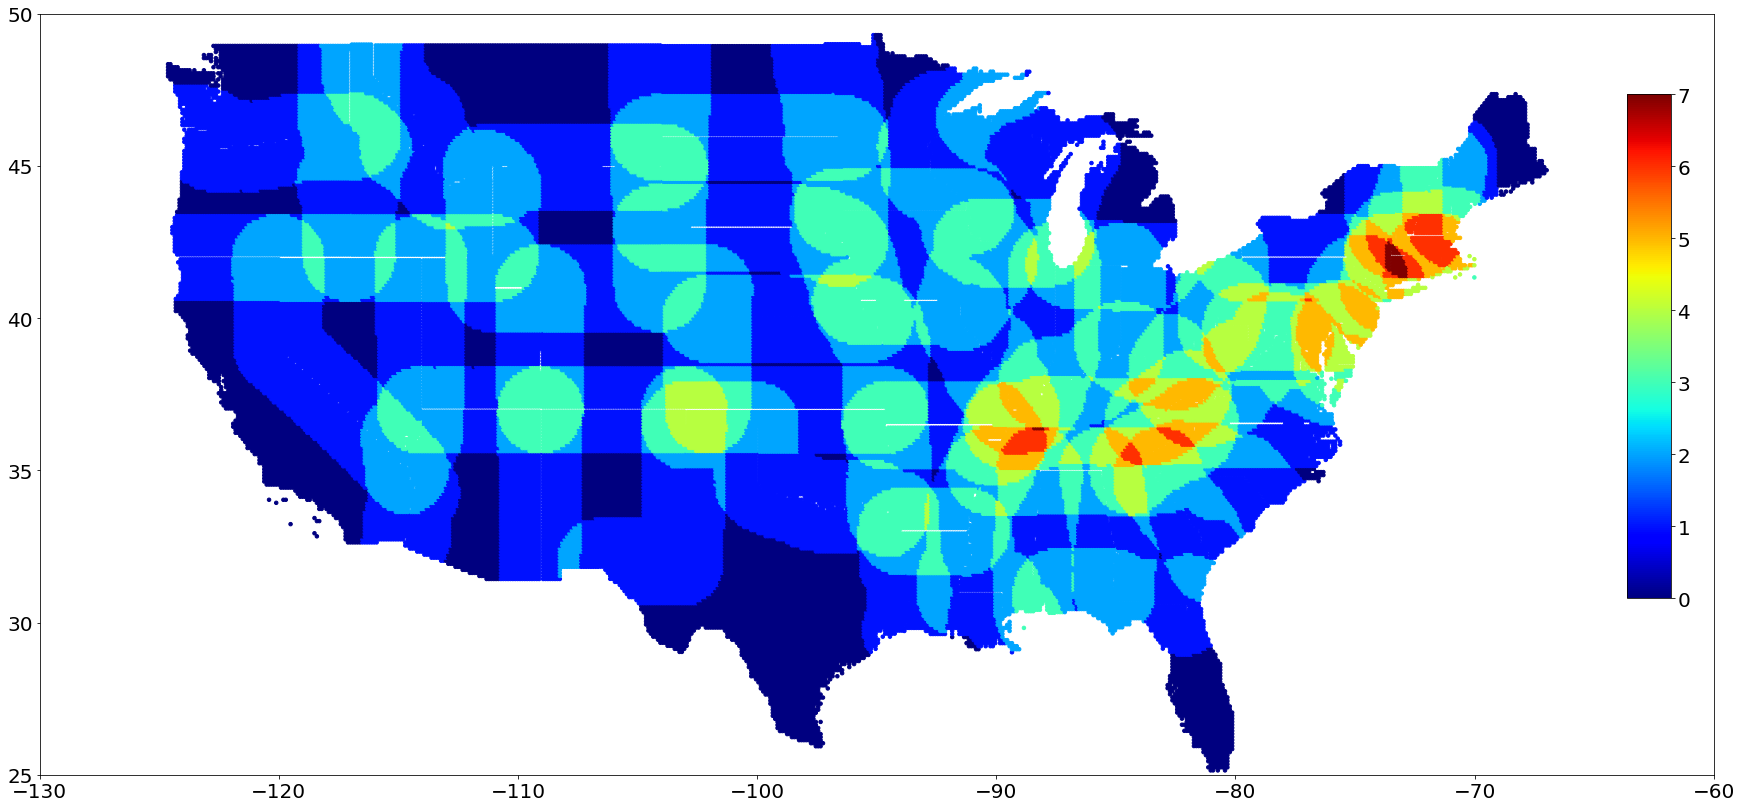

In [157]:
# plot results from above seperately 

def plot_map(xlims, ylims):
    
    fig, axes = plt.subplots(1, figsize=(30, 14), sharey=True, sharex=True)
    snorm, cnorm = 12, 1               
    s = snorm
    c = cnorm*np.ones(len(grid))
    m = '^'

    cax = fig.add_axes([0.86, 0.3, 0.02, 0.5])
    fsize = 20
    plt.rc('font', size=fsize)          # controls default text sizes
    plt.rc('axes', titlesize=fsize)     # fontsize of the axes title
    plt.rc('axes', labelsize=fsize)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=fsize)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=fsize)    # fontsize of the tick labels
    plt.rc('legend', fontsize=fsize)    # legend fontsize
    plt.rc('figure', titlesize=fsize)  # fontsize of the figure title

    im = axes.scatter(np.concatenate(grid_list)[:, 1], np.concatenate(grid_list)[:, 0], s=s,
                           c=np.concatenate(contained_list)[:], cmap='jet')
    fig.colorbar(im, cax=cax)

    axes.set_xlim(xlims[0], xlims[1])
    axes.set_ylim(ylims[0], ylims[1])

plot_map((-130, -60), (25, 50))